# CLient Relationship Management

This notebook was designed for sales associates to organise client information. It helps to identify VIC, and provide corresponding information and insights for personalised product recommandation. 

In [1]:
import pandas as pd

df = pd.read_csv("example_data.csv")

In [2]:
# Display total sale and number
print(f"During XXX, there were {df["total_sale"].count()} transactions with customer details, contributing to total sale of {df["total_sale"].sum()}")

During XXX, there were 80 transactions with customer details, contributing to total sale of 16688.0


### Backet Size Summary

In [3]:
# Initialize variables to count customers in different basket size categories
over_1000_customers = []
between_500_customers = []
between_200_customers = []

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    total_sale = row["total_sale"]
    customer = row["customer"]

    # Check if the total sale is over £1000
    if total_sale >= 1000:
        over_1000_customers.append(customer)

    # Check if the total sale is between £500 and £1000
    elif total_sale >= 500:
        between_500_customers.append(customer)

    elif total_sale >= 200:
        between_200_customers.append(customer)


# Output the summary
print("**     Basket Size Summary:     **\n")
print(
    f"Customers spending over £1000: {len(over_1000_customers)}\n{over_1000_customers}"
)
print(
    f"\nCustomers spending between £500 and £1000: {len(between_500_customers)}\n{between_500_customers}"
)
print(
    f"\nCustomers spending between £200 and £500: {len(between_200_customers)}\n{between_200_customers}"
)

**     Basket Size Summary:     **

Customers spending over £1000: 2
['Jesse Roberts', 'Karen Russell']

Customers spending between £500 and £1000: 4
['Stephanie Henderson', 'Paula Giles', 'James Anderson', 'Mary Adams']

Customers spending between £200 and £500: 14
['Jose Madden MD', 'Patricia Lane', 'Alexander Edwards', 'Michael Mahoney', 'Heather Turner', 'Deborah Waters', 'Brandon Nguyen', 'Susan Gordon', 'Matthew Lane', 'Clinton Lamb', 'Christina Smith', 'Angela Gonzales', 'Rick Baker', 'Renee Cain']


### Age distribution 
It is good to know who are the customers shopping for, boys or girls? what are their age?


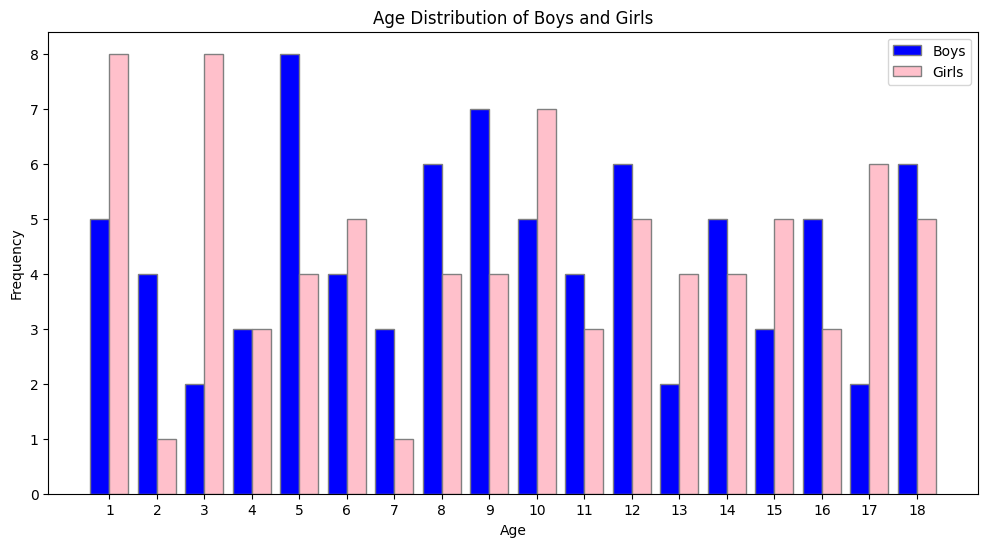

Age distribution plot 'age_distribution.png' has been created successfully.
Age distribution plot 'age_distribution.png' has been created successfully.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your original dataset
# Replace '25feb_29Apr.csv' with your actual CSV file path

# Extract age data for boys and girls from the dataset
boy_ages = df["boy_age"].tolist()
girl_ages = df["girl_age"].tolist()

# Calculate the frequency of each age
boy_age_counts = pd.Series(boy_ages).value_counts().sort_index()
girl_age_counts = pd.Series(girl_ages).value_counts().sort_index()

# Define the range of ages
ages = range(1, 19)

# Get the counts for each age, ensuring missing ages are represented as 0
boy_counts = [boy_age_counts.get(age, 0) for age in ages]
girl_counts = [girl_age_counts.get(age, 0) for age in ages]

# Width of the bars
bar_width = 0.4

# Positions of the bars on the x-axis
r1 = [x - bar_width / 2 for x in ages]
r2 = [x + bar_width / 2 for x in ages]

# Plotting the age distribution
plt.figure(figsize=(12, 6))

# Boys' age distribution
plt.bar(r1, boy_counts, color="blue", width=bar_width, edgecolor="grey", label="Boys")

# Girls' age distribution
plt.bar(r2, girl_counts, color="pink", width=bar_width, edgecolor="grey", label="Girls")

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Boys and Girls")
plt.xticks(ages)
plt.legend(loc="upper right")

# Save the plot as an image
plt.savefig("age_distribution.png")

# Show the plot
plt.show()

print("Age distribution plot 'age_distribution.png' has been created successfully.")
# Show the plot
plt.show()

print("Age distribution plot 'age_distribution.png' has been created successfully.")

### Returing Customer list

In [10]:
# These customer shopped more than one time from Siyu


df[df["customer"].duplicated(keep="last")]

,customer,total_sale,no_item,boy_age,girl_age,price_sensetivity,other,price_sensitivity


Note that we are using example data, which does not have repeating names so there will not be returning customer listing here.

### VIC customer information report for clientelling and outreaching

In [8]:
df_vic = df[df["total_sale"].rank(pct=True) > 0.9]

In [17]:
# print(df_vic[['customer',"other"]])

customer_info = df_vic[["customer", "boy_age","","other"]].values.tolist()


# Print the tabulated customer information
%pip install tabulate
from tabulate import tabulate

print(
    tabulate(
        customer_info, headers=["Top 10 % Customer","Boy age", "Girl age","Outreach Information"], tablefmt="grid", maxcolwidths=50
    )
)

Note: you may need to restart the kernel to use updated packages.
+---------------------+-----------+------------+---------------------------------------------------+
| Top 10 % Customer   |   Boy age |   Girl age | Outreach Information                              |
+=====================+===========+============+===================================================+
| Jesse Roberts       |        16 |         18 | Peanuts are one of the ingredients of dynamite.   |
+---------------------+-----------+------------+---------------------------------------------------+
| Karen Russell       |         5 |         15 | Recycling one glass jar, saves enough energy to   |
|                     |           |            | watch T.V for 3 hours!                            |
+---------------------+-----------+------------+---------------------------------------------------+
| Stephanie Henderson |         5 |          4 | 3.9% of all women do not wear underwear.          |
+---------------------+--

*Note*: 
1. the list should be showing detail information of the customer in real case; it was replaced by random facts to protect the privacy.
2. I work for a Kids' clothing store, so listing boy & girl's age is helpful when contacting their parents and recommand products accordingly.

### Export report to PDF

In [14]:
%pip install pandas faker reportlab tabulate

from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle
from reportlab.lib import colors
from tabulate import tabulate

# Define table data
customer_info = df_vic[['customer', 'other']].values.tolist()

# Define headers for the table
headers = ['Customer', 'Outreach Information']

# Create a PDF document
pdf_filename = "customer_information.pdf"
pdf = SimpleDocTemplate(pdf_filename, pagesize=letter)

# Create a table and style
table = tabulate(customer_info, headers=["Top 10 % Customer", "Outreach Information"], tablefmt="grid", maxcolwidths=50)

# Add table to the PDF document
pdf.build([table])

print(f"PDF file '{pdf_filename}' has been created successfully.")


  Using cached reportlab-4.2.0-py3-none-any.whl.metadata (1.4 kB)
Using cached reportlab-4.2.0-py3-none-any.whl (1.9 MB)
Note: you may need to restart the kernel to use updated packages.


AttributeError: 'str' object has no attribute 'getKeepWithNext'